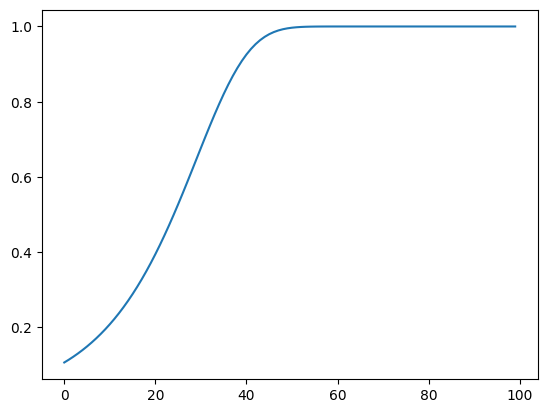

In [25]:
import numpy as np

import matplotlib.pyplot as plt

iters = 100


r = 1
r0 = 10

tau = (1/(3*r0))**(2/iters)

results = []
for i in range(iters):
    r0 *= tau
    results.append(np.tanh(r/r0))

plt.plot(results)






In [16]:
results[0]

0.09731188861075782

In [3]:
import pandas as pd


df = pd.read_csv('decay.csv')

In [10]:
lst_of_vals = df.values

In [11]:
lst_of_vals


array([['  [9.43185399e-02 1.43358511e-11]]'],
       [' [[1.43358511e-11 1.12276842e-01]'],
       ['  [1.12276842e-01 1.43358511e-11]]'],
       ...,
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [47]:
# open an npy file
data = np.load('fr_arr.npy')

avg_data = np.mean(data, axis=1)



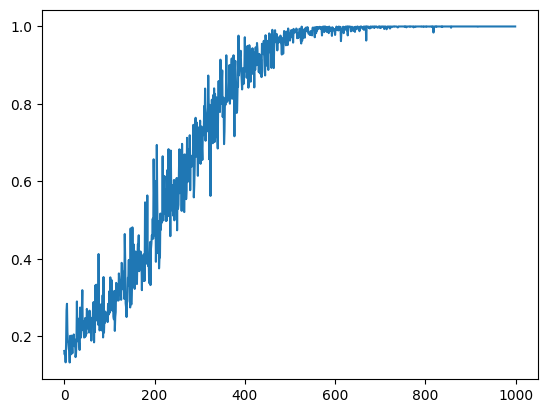

In [48]:
plt.plot(avg_data)